In [1]:
import pandas as pd
import numpy as np
import fiona
from shapely.geometry import shape, Polygon, MultiPolygon, Point, MultiPoint
import cPickle as pickle

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_pickle('df_1to1999_geo_cleaned.pkl')

In [4]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA"
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ..."


In [5]:
# Read in shapefile
shapefilename = 'data/tl_2013_53_bg_Seattle'
shp = fiona.open(shapefilename+'.shp')

In [6]:
# Get neighborhood polys and their indices
polys = [shape(pol['geometry']) for pol in shp] #This might have been an unnecessary step; 
                                                #I might have gone straight to MultiPolygon
#shp.close()

In [7]:
len(polys)

576

In [8]:
print polys[0]

POLYGON ((-122.263118 47.504886, -122.263105 47.506122, -122.261288 47.506116, -122.259464 47.506108, -122.259446 47.507681, -122.259439 47.508218, -122.25943 47.509692, -122.258751 47.509697, -122.257075 47.5097, -122.255897 47.509704, -122.255907 47.508198, -122.255917 47.507642, -122.254753 47.506561, -122.254539 47.506351, -122.253306 47.505218, -122.251624 47.503657, -122.251151 47.50321899999999, -122.250865 47.502903, -122.250814 47.502831, -122.251413 47.502801, -122.251642 47.50282499999999, -122.25362 47.502729, -122.259515 47.502537, -122.259529 47.501306, -122.262399 47.501345, -122.262364 47.502523, -122.261325 47.502509, -122.261335 47.502714, -122.262496 47.503313, -122.263137 47.503313, -122.263118 47.504886))


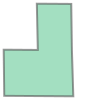

In [9]:
polys[2]

In [10]:
shp.schema

{'geometry': 'Polygon',
 'properties': OrderedDict([(u'STATEFP', 'str:2'), (u'COUNTYFP', 'str:3'), (u'TRACTCE', 'str:6'), (u'BLKGRPCE', 'str:1'), (u'GEOID', 'str:12'), (u'NAMELSAD', 'str:13'), (u'MTFCC', 'str:5'), (u'FUNCSTAT', 'str:1'), (u'ALAND', 'float:14'), (u'AWATER', 'float:14'), (u'INTPTLAT', 'str:11'), (u'INTPTLON', 'str:12')])}

In [11]:
total=0
aList = []
for feature in shp:
    total +=1
    print total, feature['properties']['GEOID'], feature['properties']['NAMELSAD'], feature['geometry']['type']
    aList.append(feature['properties']['GEOID'])

1 530330119003 Block Group 3 Polygon
2 530330222031 Block Group 1 Polygon
3 530330012002 Block Group 2 Polygon
4 530330079005 Block Group 5 Polygon
5 530330275002 Block Group 2 Polygon
6 530330046002 Block Group 2 Polygon
7 530330069001 Block Group 1 Polygon
8 530330114012 Block Group 2 Polygon
9 530330047001 Block Group 1 Polygon
10 530330213002 Block Group 2 Polygon
11 530330097021 Block Group 1 Polygon
12 530330013002 Block Group 2 Polygon
13 530330034002 Block Group 2 Polygon
14 530330061003 Block Group 3 Polygon
15 530330030004 Block Group 4 Polygon
16 530330028002 Block Group 2 Polygon
17 530330001001 Block Group 1 Polygon
18 530330001004 Block Group 4 Polygon
19 530330002001 Block Group 1 Polygon
20 530330002002 Block Group 2 Polygon
21 530330002003 Block Group 3 Polygon
22 530330002006 Block Group 6 Polygon
23 530330002005 Block Group 5 Polygon
24 530330003001 Block Group 1 Polygon
25 530330003002 Block Group 2 Polygon
26 530330004011 Block Group 1 Polygon
27 530330004012 Block

In [12]:
# Associate each block group polygon with its GEOID
block_group_tup = []
idx = 0
mpolys = MultiPolygon(polys)
for feature in shp:
    print mpolys[idx] #What is this step doing?  All this is doing is making polys into a GeometryCollection
    idx += 1
    if idx == 1:
        break
#     print feature['properties']['GEOID']

POLYGON ((-122.263118 47.504886, -122.263105 47.506122, -122.261288 47.506116, -122.259464 47.506108, -122.259446 47.507681, -122.259439 47.508218, -122.25943 47.509692, -122.258751 47.509697, -122.257075 47.5097, -122.255897 47.509704, -122.255907 47.508198, -122.255917 47.507642, -122.254753 47.506561, -122.254539 47.506351, -122.253306 47.505218, -122.251624 47.503657, -122.251151 47.50321899999999, -122.250865 47.502903, -122.250814 47.502831, -122.251413 47.502801, -122.251642 47.50282499999999, -122.25362 47.502729, -122.259515 47.502537, -122.259529 47.501306, -122.262399 47.501345, -122.262364 47.502523, -122.261325 47.502509, -122.261335 47.502714, -122.262496 47.503313, -122.263137 47.503313, -122.263118 47.504886))


In [13]:
type(MultiPolygon(polys))

shapely.geometry.multipolygon.MultiPolygon

In [14]:
type(polys)

list

OK, now I see.  polys is just a list of shapely polygon geometries, while MultiPolygon is itself a shapely geometry.  Other than that, the difference may not be important.

In [15]:
len(MultiPolygon(polys).geoms)

576

In [16]:
len(MultiPolygon(polys))

576

In [17]:
type(MultiPolygon(polys)[1])

shapely.geometry.polygon.Polygon

In [18]:
type(MultiPolygon(polys))

shapely.geometry.multipolygon.MultiPolygon

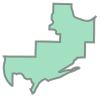

In [19]:
mpolys[1]

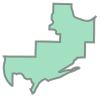

In [20]:
MultiPolygon(polys)[1]

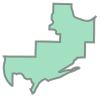

In [21]:
polys[1]

In [22]:
len(mpolys)

576

In [23]:
# Associate each block group polygon with its GEOID
block_group_tup = []
idx = 0
for feature in shp:
    block_group_tup.append((mpolys[idx],\
    feature['properties']['GEOID']))
    idx += 1

In [24]:
#shp.close()

In [25]:
with open('all_potholes.pkl') as f:
        all_potholes = pickle.load(f)


In [26]:
# Extract the block group label associated with each pothole
block_group_label = []
for hole in xrange(len(all_potholes[0])):
    found = False
    for group in xrange(len(block_group_tup)):
        if block_group_tup[group][0].contains(all_potholes[0][hole]):
            block_group_label.append(block_group_tup[group][1])
            found = True
    if not found:   
#     if found == False:
        block_group_label.append('')
            

In [27]:
len(block_group_label), len(all_potholes[0]) #Notice different number of potholes, since I have more of them now.

(1320, 1320)

In [28]:
# Add block group to dataframe
df['GEOID'] = pd.Series(block_group_label,\
    index = df.index.tolist())

In [29]:
df.GEOID.shape

(1320L,)

In [30]:
df.shape

(1320, 13)

In [31]:
len(all_potholes[1]) #My problem is that this list is shorter because it was created with df_geo_cleaned, a shorter list of potholes

1320

In [32]:
df[df.GEOID=='']

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,GEOID
322,323,360163,117 S WASHINGTON ST ...,S WASHINGTON ST BETWEEN OCCIDENTAL AVE S AND 2...,2015-06-29 07:00:00,2015-06-30 07:00:00,2015-06-30 07:00:00,1 days,1,47.426947,-122.333367,"2nd Ave S, Seattle, WA, USA",
367,368,332082,S KENYON ST BETWEEN 2ND AVE S AND OCCIDENTAL A...,S KENYON ST BETWEEN OCCIDENTAL AVE S AND 2ND A...,2015-02-13 08:00:00,2015-02-18 08:00:00,2015-02-18 08:00:00,5 days,5,47.426947,-122.333367,"2nd Ave S, Seattle, WA, USA",
554,555,351330,S KENYON ST BETWEEN OCCIDENTAL AVE S AND 2ND A...,S KENYON ST BETWEEN OCCIDENTAL AVE S AND 2ND A...,2015-05-11 07:00:00,2015-05-13 07:00:00,2015-05-13 07:00:00,2 days,2,47.426947,-122.333367,"2nd Ave S, Seattle, WA, USA",
688,689,270417,2035 FEDERAL AVE E ...,FEDERAL AVE E BETWEEN E NEWTON ST AND E BOSTON...,2014-04-21 07:00:00,2014-04-23 07:00:00,2014-04-23 07:00:00,2 days,2,47.638712,-122.301795,"E Boston St, Seattle, WA, USA",
766,767,267533,Description:\n\npothole in E Newton Street bet...,FAIRVIEW AVE E BETWEEN E NEWTON ST AND E BOSTO...,2014-04-03 07:00:00,2014-04-08 07:00:00,2014-04-08 07:00:00,5 days,5,47.638712,-122.301795,"E Boston St, Seattle, WA, USA",
782,783,200928,2003 Eastlake E ...,EASTLAKE AVE E BETWEEN E NEWTON ST AND E BOSTO...,2013-05-24 07:00:00,2013-05-25 07:00:00,2013-05-25 07:00:00,1 days,1,47.638712,-122.301795,"E Boston St, Seattle, WA, USA",
1338,1339,48460,5200-5298 S. Wallace st. seattle ...,S WALLACE ST BETWEEN 56TH PL S AND 53RD AVE S ...,2011-01-13 08:00:00,2011-03-04 08:00:00,2011-03-04 08:00:00,50 days,50,47.481400,-122.268409,"53rd Ave S, Seattle, WA, USA",
1600,1601,77960,51st Ave S from Rainier Ave S to S Hazel St. ...,S HAZEL ST BETWEEN 51ST AVE S AND 53RD AVE S ...,2011-08-25 07:00:00,2011-08-31 07:00:00,2011-08-31 07:00:00,6 days,6,47.481400,-122.268409,"53rd Ave S, Seattle, WA, USA",
1717,1718,49509,Webster Ave S and 44th Ave S ...,S WEBSTER ST BETWEEN 44TH AVE S AND 45TH AVE S...,2011-01-19 08:00:00,2011-02-01 08:00:00,2011-02-01 08:00:00,13 days,13,47.458872,-122.276804,"45th Ave S, Seattle, WA, USA",


In [33]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,GEOID
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",530330114011
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",530330053022


In [34]:
df['GEOID']

0       530330114011
1       530330053022
2       530330011001
3       530330091002
5       530330042005
6       530330005002
9       530330073001
10      530330058012
12      530330081002
13      530330026003
14      530330078001
15      530330100011
16      530330012004
18      530330003002
19      530330003002
20      530330016002
21      530330093003
23      530330033003
24      530330118004
25      530330093003
26      530330062002
28      530330090002
32      530330007004
37      530330094004
38      530330005002
39      530330062001
41      530330073003
43      530330068002
44      530330110021
45      530330031002
            ...     
1957    530330006004
1958    530330014002
1959    530330107012
1960    530330094005
1962    530330065001
1963    530330104012
1965    530330118003
1966    530330062003
1967    530330006003
1968    530330100013
1970    530330011002
1972    530330012005
1973    530330012005
1974    530330077002
1977    530330085003
1979    530330064001
1980    53033

In [35]:
len(set(block_group_label))

322

Now read in and join the csv file

In [36]:
df_econ = pd.read_csv('data/ACS_13_5YR_B25077_with_ann.csv', skiprows=range(1,2))

In [37]:
df_econ.head(3)

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,1500000US530330001001,530330001001,"Block Group 1, Census Tract 1, King County, Wa...",527700,93650
1,1500000US530330001002,530330001002,"Block Group 2, Census Tract 1, King County, Wa...",321200,44352
2,1500000US530330001003,530330001003,"Block Group 3, Census Tract 1, King County, Wa...",400700,56335


In [38]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1421
Data columns (total 5 columns):
GEO.id               1422 non-null object
GEO.id2              1422 non-null int64
GEO.display-label    1422 non-null object
HD01_VD01            1422 non-null object
HD02_VD01            1422 non-null object
dtypes: int64(1), object(4)
memory usage: 66.7+ KB


In [39]:
df_econ.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HD01_VD01',
       u'HD02_VD01'],
      dtype='object')

In [40]:
df_econ.shape

(1422, 5)

In [41]:
df.shape

(1320, 13)

In [42]:
df_econ.rename(columns={'GEO.id2':'GEOID'}, inplace=True)

In [43]:
df_econ.columns

Index([u'GEO.id', u'GEOID', u'GEO.display-label', u'HD01_VD01', u'HD02_VD01'], dtype='object')

In [44]:
df_econ.head(2)

,GEO.id,GEOID,GEO.display-label,HD01_VD01,HD02_VD01
0,1500000US530330001001,530330001001,"Block Group 1, Census Tract 1, King County, Wa...",527700,93650
1,1500000US530330001002,530330001002,"Block Group 2, Census Tract 1, King County, Wa...",321200,44352


In [45]:
df_econ[df_econ['GEOID'] == 530330114011]

,GEO.id,GEOID,GEO.display-label,HD01_VD01,HD02_VD01
442,1500000US530330114011,530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269


In [46]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1421
Data columns (total 5 columns):
GEO.id               1422 non-null object
GEOID                1422 non-null int64
GEO.display-label    1422 non-null object
HD01_VD01            1422 non-null object
HD02_VD01            1422 non-null object
dtypes: int64(1), object(4)
memory usage: 66.7+ KB


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1998
Data columns (total 13 columns):
OBJECTID         1320 non-null int64
WOKEY            1320 non-null int64
LOCATION         1320 non-null object
ADDRDESC         1320 non-null object
INITDT_dt        1320 non-null datetime64[ns]
FLDSTARTDT_dt    1320 non-null datetime64[ns]
FLDENDDT_dt      1320 non-null datetime64[ns]
DURATION         1320 non-null timedelta64[ns]
DURATION_td      1320 non-null float64
latitude         1320 non-null float64
longitude        1320 non-null float64
address          1320 non-null object
GEOID            1320 non-null object
dtypes: datetime64[ns](3), float64(3), int64(2), object(4), timedelta64[ns](1)
memory usage: 144.4+ KB


In [48]:
type(df['GEOID'][0])

unicode

In [49]:
df['GEOID'][0]

u'530330114011'

In [50]:
type(df_econ['GEOID'][0].astype('unicode'))

numpy.unicode_

In [51]:
df_econ['GEOID'][0].astype('unicode')

u'530330001001'

In [52]:
df_econ['GEOID'] = df_econ['GEOID'].astype('unicode')

In [53]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,GEOID
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",530330114011
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",530330053022


In [54]:
df_both = pd.merge(df, df_econ, how='left', on='GEOID')

In [55]:
df_both.head(10)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,GEOID,GEO.id,GEO.display-label,HD01_VD01,HD02_VD01
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",-,**
2,3,2649,32nd Ave NE and NE 135th ...,NE 135TH ST BETWEEN 32ND AVE NE AND LAKE CITY ...,2010-03-31 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,1 days,1,47.707446,-122.301566,"Lake City Way NE, Seattle, WA, USA",530330011001,1500000US530330011001,"Block Group 1, Census Tract 11, King County, W...",416900,62441
3,4,1591,Charles st & 6 Ave S pothole next to traffic l...,S CHARLES ST BETWEEN 6TH AVE S AND MAYNARD AVE...,2010-03-15 07:00:00,2010-03-16 07:00:00,2010-03-16 07:00:00,1 days,1,47.597085,-122.325065,"Maynard Ave S, Seattle, WA, USA",530330091002,1500000US530330091002,"Block Group 2, Census Tract 91, King County, W...",328900,145688
4,6,5642,52nd St. & 18th Ave. NE ...,18TH AVE NE BETWEEN NE 52ND ST AND NE 55TH ST ...,2010-04-19 07:00:00,2010-04-22 07:00:00,2010-04-22 07:00:00,3 days,3,47.668522,-122.295630,"NE 55th St, Seattle, WA 98105, USA",530330042005,1500000US530330042005,"Block Group 5, Census Tract 42, King County, W...",637000,56463
5,7,7585,...,3RD AVE NW BETWEEN NW 125TH ST AND NW 127TH ST...,2010-05-03 07:00:00,2010-05-04 07:00:00,2010-05-04 07:00:00,1 days,1,47.721476,-122.364984,"NW 127th St, Seattle, WA 98177, USA",530330005002,1500000US530330005002,"Block Group 2, Census Tract 5, King County, Wa...",565200,53534
6,10,7211,Republican and Minor Ave N ...,MINOR AVE N AND REPUBLICAN ST ...,2010-04-29 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,4 days,4,47.623131,-122.333003,"Republican St & Minor Ave N, Seattle, WA 98109...",530330073001,1500000US530330073001,"Block Group 1, Census Tract 73, King County, W...",-,**
7,11,3168,...,17TH AVE W BETWEEN W DRAVUS ST AND W BERTONA S...,2010-04-02 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,4 days,4,47.650311,-122.388604,"W Bertona St, Seattle, WA, USA",530330058012,1500000US530330058012,"Block Group 2, Census Tract 58.01, King County...",255200,50905
8,13,6967,B/T Pike and Pine B/t 211 and 215 ...,PIKE ST BETWEEN 2ND AVE AND 3RD AVE ...,2010-04-28 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,5 days,5,47.610741,-122.338703,"3rd Ave, Seattle, WA, USA",530330081002,1500000US530330081002,"Block Group 2, Census Tract 81, King County, W...",384400,224247
9,14,7107,17th Ave NE Exit of University of Washington ...,NE 45TH ST BETWEEN 15TH AVE NE AND 16TH AVE NE...,2010-04-29 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,4 days,4,47.675800,-122.310849,"16th Ave NE, Seattle, WA, USA",530330026003,1500000US530330026003,"Block Group 3, Census Tract 26, King County, W...",450600,59449


In [56]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1319
Data columns (total 17 columns):
OBJECTID             1320 non-null int64
WOKEY                1320 non-null int64
LOCATION             1320 non-null object
ADDRDESC             1320 non-null object
INITDT_dt            1320 non-null datetime64[ns]
FLDSTARTDT_dt        1320 non-null datetime64[ns]
FLDENDDT_dt          1320 non-null datetime64[ns]
DURATION             1320 non-null timedelta64[ns]
DURATION_td          1320 non-null float64
latitude             1320 non-null float64
longitude            1320 non-null float64
address              1320 non-null object
GEOID                1320 non-null object
GEO.id               1311 non-null object
GEO.display-label    1311 non-null object
HD01_VD01            1311 non-null object
HD02_VD01            1311 non-null object
dtypes: datetime64[ns](3), float64(3), int64(2), object(8), timedelta64[ns](1)
memory usage: 185.6+ KB


In [57]:
#df_both.drop(['GEO.display-label'],inplace=True,axis=1)

It worked.  Finally, I have some economic values.  I had to cast the econ GEOID column from np.int64 to unicode to match the potholes df.  Still some missing values.

In [58]:
type(float(df_both['HD01_VD01'][0]))

float

In [59]:
float(df_both['HD01_VD01'][0])

307500.0

In [60]:
#d = d.applymap(lambda x: np.nan if isinstance(x, basestring) and x.isspace() else x)

In [61]:
df_both['HD01_VD01'] = df_both['HD01_VD01'].convert_objects(convert_numeric=True)

In [62]:
df_both['HD02_VD01'] = df_both['HD02_VD01'].convert_objects(convert_numeric=True)

In [63]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1319
Data columns (total 17 columns):
OBJECTID             1320 non-null int64
WOKEY                1320 non-null int64
LOCATION             1320 non-null object
ADDRDESC             1320 non-null object
INITDT_dt            1320 non-null datetime64[ns]
FLDSTARTDT_dt        1320 non-null datetime64[ns]
FLDENDDT_dt          1320 non-null datetime64[ns]
DURATION             1320 non-null timedelta64[ns]
DURATION_td          1320 non-null float64
latitude             1320 non-null float64
longitude            1320 non-null float64
address              1320 non-null object
GEOID                1320 non-null object
GEO.id               1311 non-null object
GEO.display-label    1311 non-null object
HD01_VD01            1239 non-null float64
HD02_VD01            1239 non-null float64
dtypes: datetime64[ns](3), float64(5), int64(2), object(6), timedelta64[ns](1)
memory usage: 185.6+ KB


In [64]:
df_both.head(15)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,GEOID,GEO.id,GEO.display-label,HD01_VD01,HD02_VD01
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN
2,3,2649,32nd Ave NE and NE 135th ...,NE 135TH ST BETWEEN 32ND AVE NE AND LAKE CITY ...,2010-03-31 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,1 days,1,47.707446,-122.301566,"Lake City Way NE, Seattle, WA, USA",530330011001,1500000US530330011001,"Block Group 1, Census Tract 11, King County, W...",416900,62441
3,4,1591,Charles st & 6 Ave S pothole next to traffic l...,S CHARLES ST BETWEEN 6TH AVE S AND MAYNARD AVE...,2010-03-15 07:00:00,2010-03-16 07:00:00,2010-03-16 07:00:00,1 days,1,47.597085,-122.325065,"Maynard Ave S, Seattle, WA, USA",530330091002,1500000US530330091002,"Block Group 2, Census Tract 91, King County, W...",328900,145688
4,6,5642,52nd St. & 18th Ave. NE ...,18TH AVE NE BETWEEN NE 52ND ST AND NE 55TH ST ...,2010-04-19 07:00:00,2010-04-22 07:00:00,2010-04-22 07:00:00,3 days,3,47.668522,-122.295630,"NE 55th St, Seattle, WA 98105, USA",530330042005,1500000US530330042005,"Block Group 5, Census Tract 42, King County, W...",637000,56463
5,7,7585,...,3RD AVE NW BETWEEN NW 125TH ST AND NW 127TH ST...,2010-05-03 07:00:00,2010-05-04 07:00:00,2010-05-04 07:00:00,1 days,1,47.721476,-122.364984,"NW 127th St, Seattle, WA 98177, USA",530330005002,1500000US530330005002,"Block Group 2, Census Tract 5, King County, Wa...",565200,53534
6,10,7211,Republican and Minor Ave N ...,MINOR AVE N AND REPUBLICAN ST ...,2010-04-29 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,4 days,4,47.623131,-122.333003,"Republican St & Minor Ave N, Seattle, WA 98109...",530330073001,1500000US530330073001,"Block Group 1, Census Tract 73, King County, W...",NaN,NaN
7,11,3168,...,17TH AVE W BETWEEN W DRAVUS ST AND W BERTONA S...,2010-04-02 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,4 days,4,47.650311,-122.388604,"W Bertona St, Seattle, WA, USA",530330058012,1500000US530330058012,"Block Group 2, Census Tract 58.01, King County...",255200,50905
8,13,6967,B/T Pike and Pine B/t 211 and 215 ...,PIKE ST BETWEEN 2ND AVE AND 3RD AVE ...,2010-04-28 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,5 days,5,47.610741,-122.338703,"3rd Ave, Seattle, WA, USA",530330081002,1500000US530330081002,"Block Group 2, Census Tract 81, King County, W...",384400,224247
9,14,7107,17th Ave NE Exit of University of Washington ...,NE 45TH ST BETWEEN 15TH AVE NE AND 16TH AVE NE...,2010-04-29 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,4 days,4,47.675800,-122.310849,"16th Ave NE, Seattle, WA, USA",530330026003,1500000US530330026003,"Block Group 3, Census Tract 26, King County, W...",450600,59449


In [65]:
#view the NaNs

In [66]:
df_both[pd.isnull(df_both.HD01_VD01 )].shape

(81, 17)

Clearly, there are going to be NaNs for economic data.

In [67]:
shp.close()